## Multilayer Perceptrons

The XOR problem is significant in the field of machine learning as it brought the limitations of simple linear models (like the Perceptron) into sharp focus. XOR is a binary classification problem that is not linearly separable (as can be seen in the output of the next cell block), meaning a single-layer perceptron (or linear model) cannot correctly classify the XOR dataset. This realization motivated the development of multilayer perceptrons (MLPs) with hidden layers, which can learn complex, non-linear decision boundaries through layered representations.

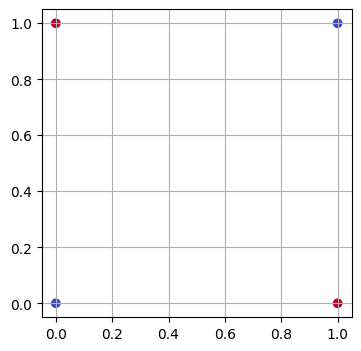

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_xs = np.array([[0,0],[0,1],[1,0],[1,1]])
data_ys = np.array([[0,1,1,0]])

fig,ax = plt.subplots(1,1,figsize=(4.,4.))
ax.scatter(data_xs[:,0],data_xs[:,1],c = data_ys.ravel(),cmap='coolwarm')
ax.grid(True)
plt.show()

Build a simple multilayer perceptron (MLP) from scratch using only the NumPy library to solve the XOR classification problem.

**Detailed Instructions**: Make an MLP with one hidden layer that has two neurons, each of which has a ReLU activation function. Use the sigmoid activation function for the output layer. Use cross-entropy loss as the training objective. Initialize the input weights as small, random values to introduce asymmetry, and initialize the biases to zero.

Train the network using the data in the cell blocks above: `data_xs` and `data_ys`, and train for 200 iterations. Every 20 iterations, record the training loss and examine the learned feature representations as well as the output of the model. Specifically, visualize the hidden layer activations and model output across as a heatmap over the input space ranging from -0.5 to 1.5 (for both features) to observe how the model differentiates between input regions. Use a colormap normalized between 0 and 1 for heatmaps to clearly visualize these activations.

Epoch 0
Loss: 0.24691746969516706
Predictions: [[0.60581909 0.60764606 0.61292839 0.61431799]]


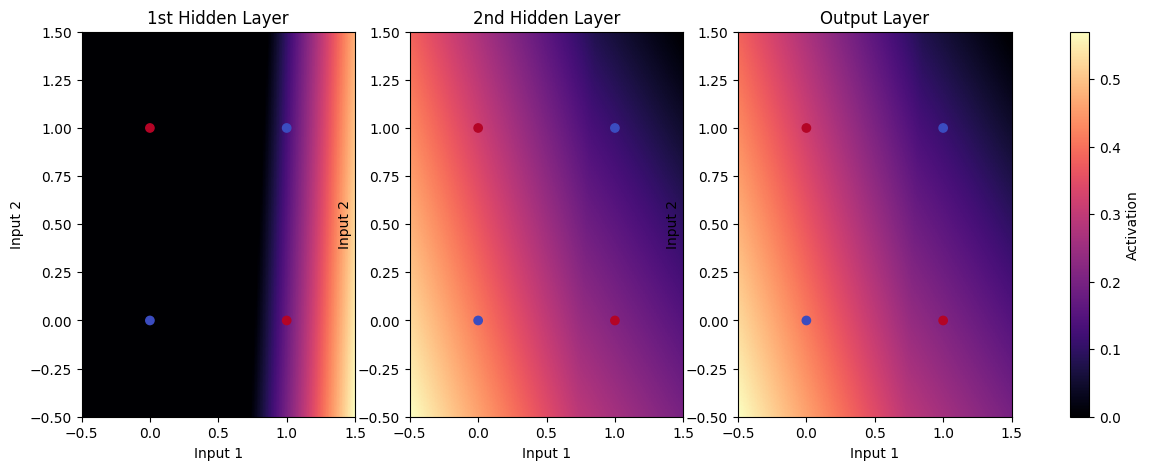

Epoch 20
Loss: 0.2629939549350849
Predictions: [[0.45642712 0.45410514 0.76908845 0.41810514]]


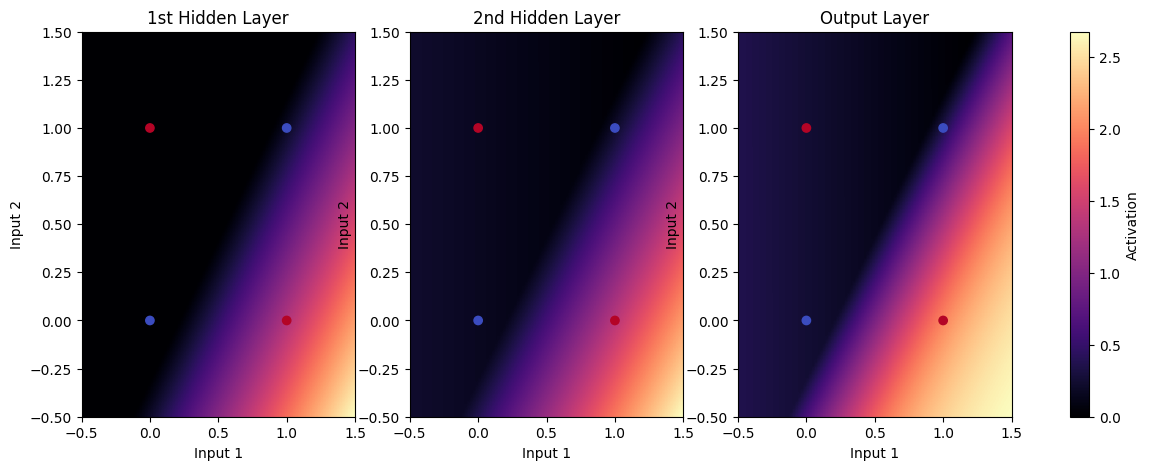

Epoch 40
Loss: 0.12284362249080029
Predictions: [[0.13904578 0.62803151 0.97413094 0.12656626]]


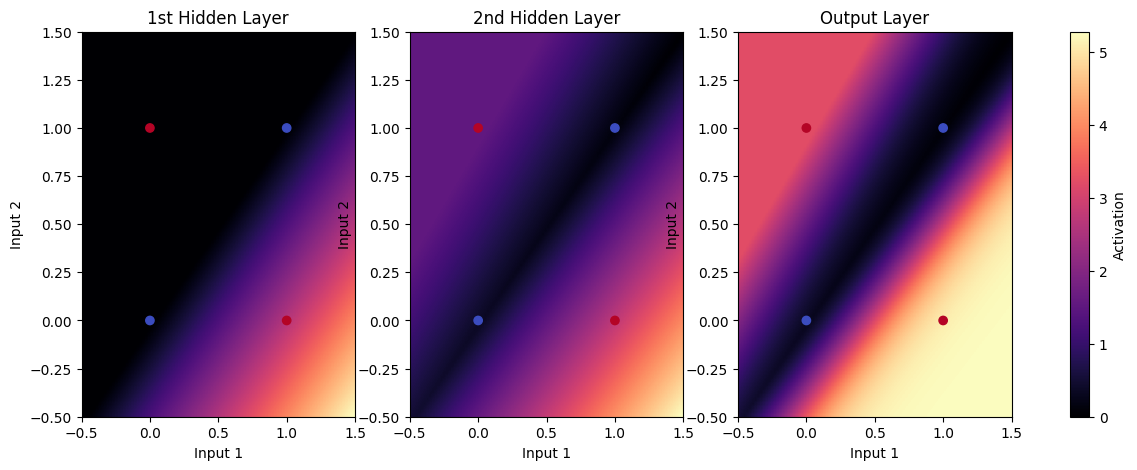

Epoch 60
Loss: 0.07833060399107653
Predictions: [[0.04440932 0.74526549 0.98087755 0.01552686]]


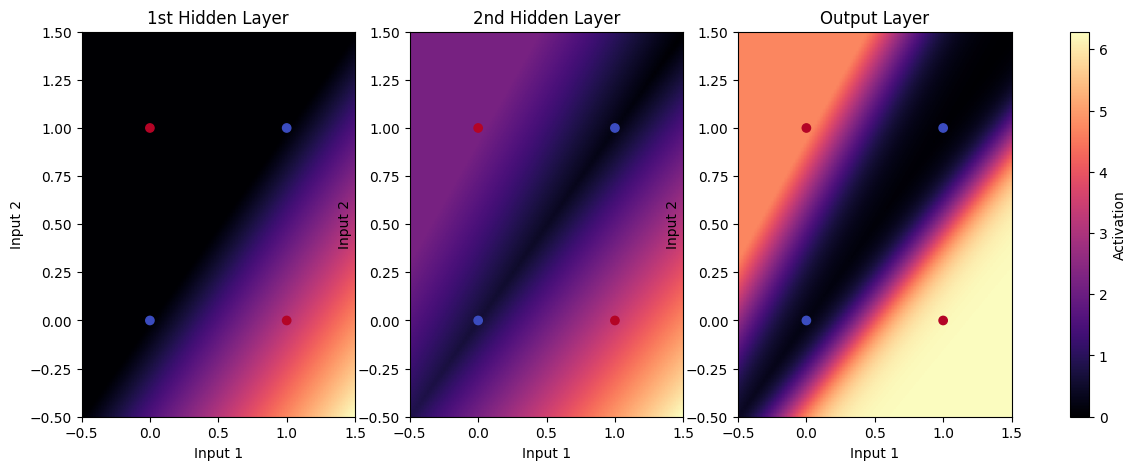

Epoch 80
Loss: 0.05178212534801034
Predictions: [[0.02655072 0.82003771 0.99131439 0.01080969]]


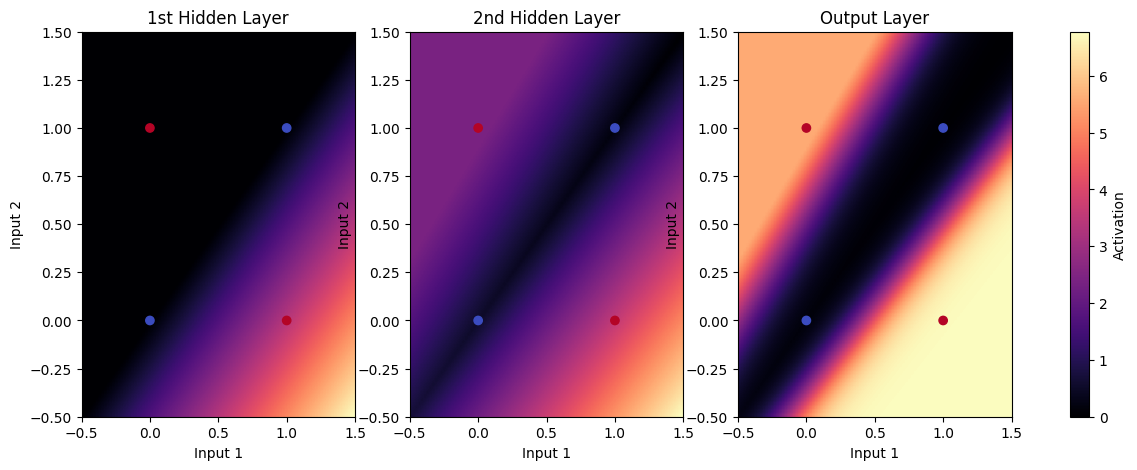

Epoch 100
Loss: 0.03791639066856027
Predictions: [[0.01649189 0.86450827 0.99394724 0.00527147]]


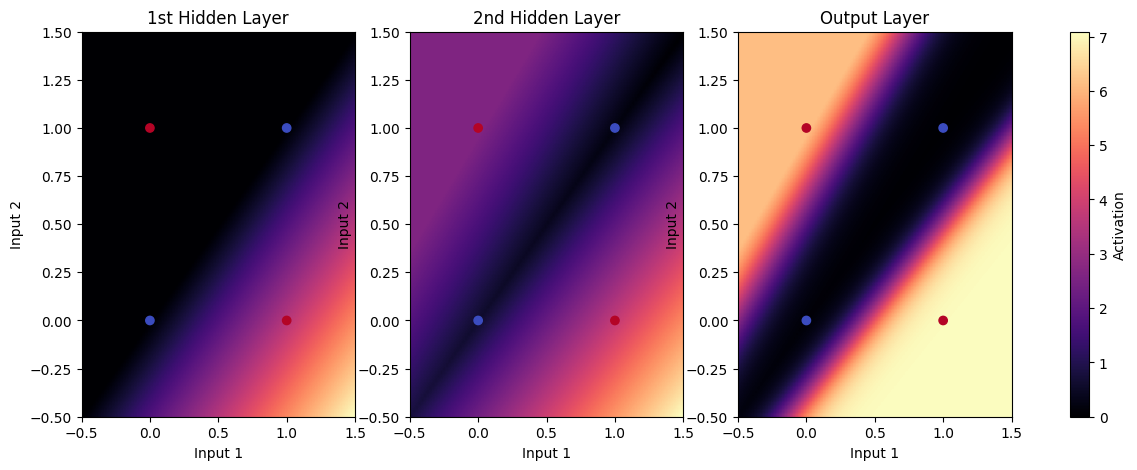

Epoch 120
Loss: 0.029431491363633346
Predictions: [[0.01176307 0.89259771 0.99590174 0.00345182]]


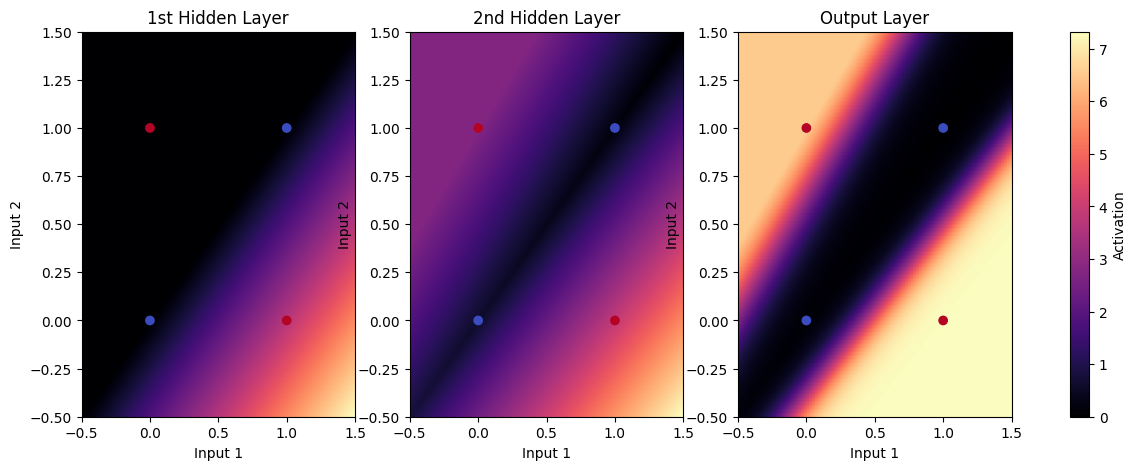

Epoch 140
Loss: 0.023779836574145268
Predictions: [[0.01067344 0.91162486 0.99741072 0.00633237]]


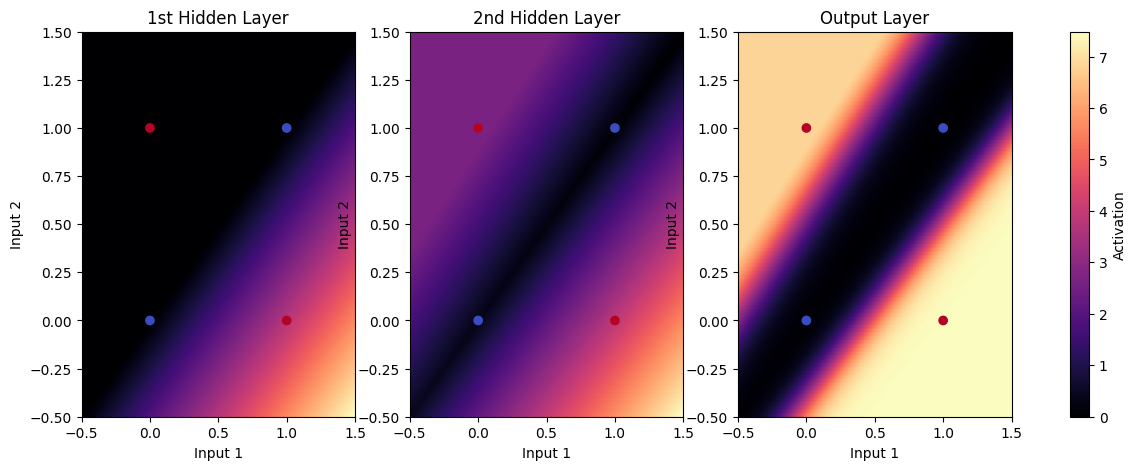

Epoch 160
Loss: 0.02009533664364304
Predictions: [[0.00820484 0.92509113 0.99748485 0.00406838]]


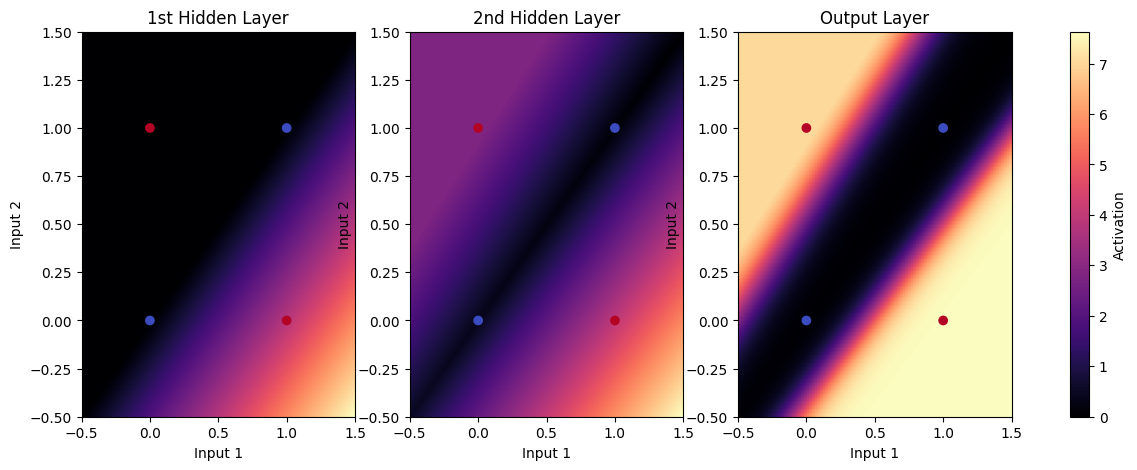

Epoch 180
Loss: 0.01727706658985529
Predictions: [[0.00670835 0.9351821  0.99790793 0.00318862]]


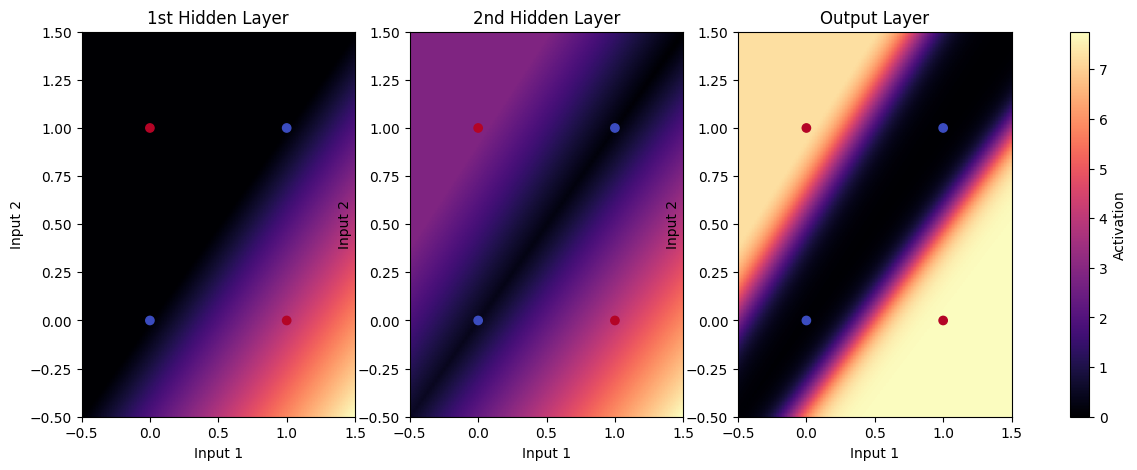

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0, 1, 1, 0]]).T

def relu_activation(x):
    # ReLU activation for the hidden layer
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_activation(x):
    # Sigmoid activation for the output layer
    return 1 / (1 + np.exp(-x))

def compute_loss(true_values, predictions):
    return -1 / len(true_values) * np.sum(np.sum(true_values * np.log(predictions)))

input_neurons = 2
hidden_neurons = 2
output_neurons = 1

weights1 = np.random.randn(input_neurons, hidden_neurons) * 0.5
bias1 = np.random.randn(1, hidden_neurons) * 0.5
weights2 = np.random.randn(hidden_neurons, output_neurons) * 0.5
bias2 = np.random.randn(1, output_neurons) * 0.5

epochs = 200
for epoch in range(epochs):

    # Forward pass
    hidden_input = np.dot(inputs, weights1) + bias1
    hidden_output = relu_activation(hidden_input)
    final_input = np.dot(hidden_output, weights2) + bias2
    final_output = sigmoid_activation(final_input)

    # Compute loss
    loss = compute_loss(targets, final_output)

    # Backward pass
    output_error = final_output - targets
    grad_weights2 = np.dot(hidden_output.T, output_error)
    grad_bias2 = np.sum(output_error, axis=0, keepdims=True) / len(inputs)
    hidden_error = np.dot(output_error, weights2.T) * relu_derivative(hidden_input)
    grad_weights1 = np.dot(inputs.T, hidden_error)
    grad_bias1 = np.sum(hidden_error, axis=0, keepdims=True) / len(inputs)

    # Updating the parameters
    weights1 -= 0.5 * grad_weights1
    bias1 -= 0.5 * grad_bias1
    weights2 -= 0.5 * grad_weights2
    bias2 -= 0.5 * grad_bias2

    if epoch % 20 == 0:
        print(f"Epoch {epoch}")
        print(f"Loss: {loss}")
        print(f"Predictions: {final_output.T}")

        # Visualization
        x1 = np.linspace(-0.5, 1.5, 100)
        x2 = np.linspace(-0.5, 1.5, 100)
        X1, X2 = np.meshgrid(x1, x2)
        grid_points = np.c_[X1.ravel(), X2.ravel()]

        # Forward pass for the grid
        hidden_input_grid = np.dot(grid_points, weights1) + bias1
        hidden_output_grid = relu_activation(hidden_input_grid)
        final_input_grid = np.dot(hidden_output_grid, weights2) + bias2
        final_output_grid = sigmoid_activation(final_input_grid)

        # Reshape activations for heatmap
        layer1_activations = hidden_output_grid[:, 0].reshape(X1.shape)
        layer2_activations = final_input_grid[:, 0].reshape(X1.shape)
        output_activations = final_output_grid.reshape(X1.shape)

        # Plot heatmaps
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        heatmap = ax[0].imshow(layer1_activations, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin="lower", cmap="magma", aspect="auto")
        ax[0].scatter(inputs[:, 0], inputs[:, 1], c=targets.ravel(), cmap='coolwarm')
        ax[0].set_xlabel("Input 1")
        ax[0].set_ylabel("Input 2")
        ax[0].set_title("1st Hidden Layer")

        ax[1].imshow(layer2_activations, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin="lower", cmap="magma", aspect="auto")
        ax[1].scatter(inputs[:, 0], inputs[:, 1], c=targets.ravel(), cmap='coolwarm')
        ax[1].set_xlabel("Input 1")
        ax[1].set_ylabel("Input 2")
        ax[1].set_title("2nd Hidden Layer")

        ax[2].imshow(output_activations, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin="lower", cmap="magma", aspect="auto")
        ax[2].scatter(inputs[:, 0], inputs[:, 1], c=targets.ravel(), cmap='coolwarm')
        ax[2].set_xlabel("Input 1")
        ax[2].set_ylabel("Input 2")
        ax[2].set_title("Output Layer")

        colorbar = fig.colorbar(heatmap, ax=ax)
        colorbar.set_label("Activation")
        plt.show()